In [ ]:
import pandas as pd

df = pd.read_csv("C:/climate_anomalies_dataset.csv")
display(df.head())

,Year,Country,CO2_Emissions_MT,Temperature_Anomaly_C,Precipitation_mm,Extreme_Weather_Events,Anomaly_Label
0,1980,USA,32331.91,-1.40,1187.57,3,0
1,1980,India,7837.36,-1.09,2351.67,8,1
2,1980,China,5260.00,0.19,574.49,3,0
3,1980,Brazil,12400.38,0.91,1903.11,10,1
4,1980,Germany,35364.92,0.18,1623.02,4,0


## EDA

Shape of the DataFrame: (450, 7)

Missing values per column:
 Year                      0
Country                   0
CO2_Emissions_MT          0
Temperature_Anomaly_C     0
Precipitation_mm          0
Extreme_Weather_Events    0
Anomaly_Label             0
dtype: int64


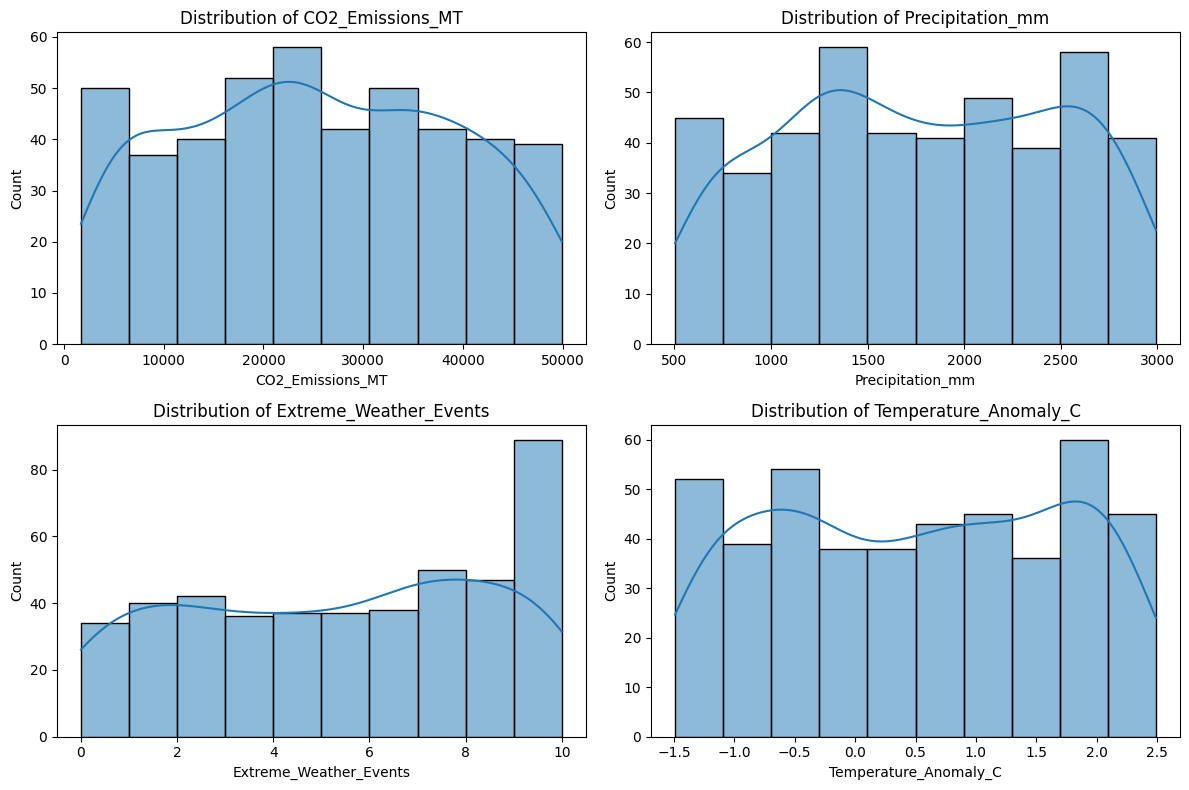


Unique countries: ['USA' 'India' 'China' 'Brazil' 'Germany' 'Australia' 'Canada' 'Russia'
 'UK' 'South Africa']

Proportion of each anomaly label:
 Anomaly_Label
0    0.604444
1    0.395556
Name: proportion, dtype: float64


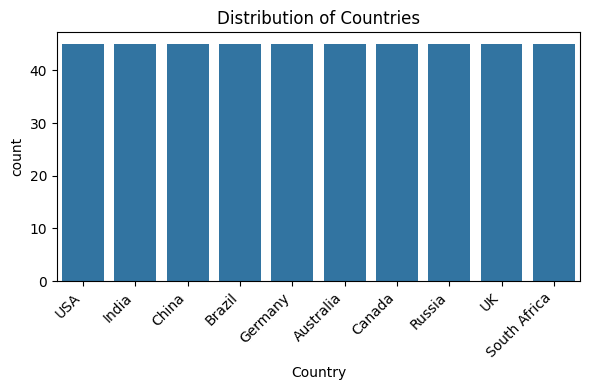

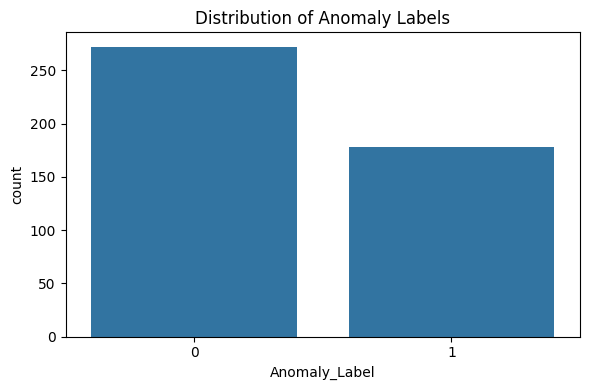

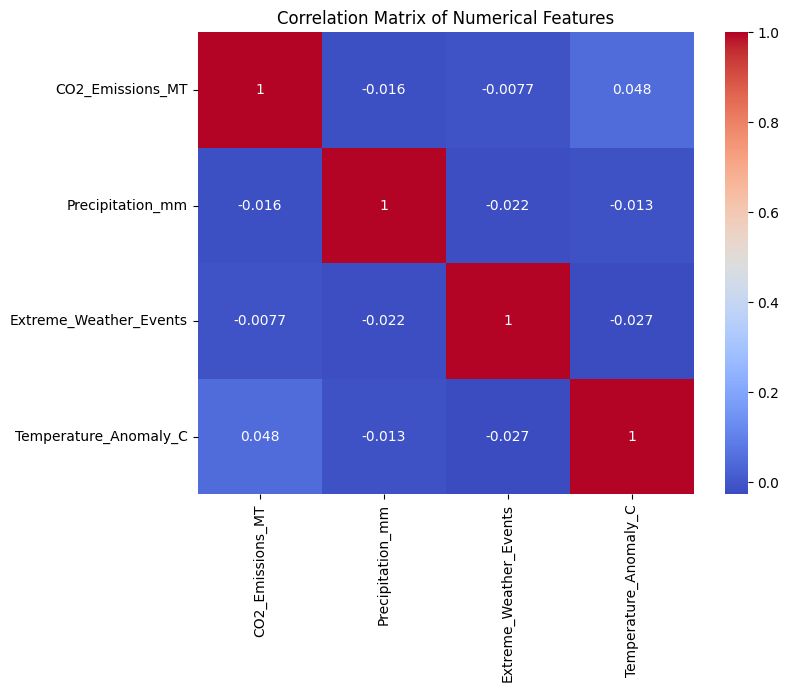


Summary:
The dataset has no missing values, which simplifies the preprocessing.
The numerical features show varying distributions. Extreme_Weather_Events seems to be skewed, CO2 Emissions has some high values, and temperature has a normal distribution.
The categorical features 'Country' shows a relatively even distribution across countries and 'Anomaly_Label' is somewhat balanced.
The correlation matrix reveals some moderate correlations among the numerical features, and this should be investigated further.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# 2. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# 3. Analyze the distribution of numerical features
numerical_cols = ['CO2_Emissions_MT', 'Precipitation_mm', 'Extreme_Weather_Events', 'Temperature_Anomaly_C']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 4. Investigate the distribution of categorical features
print("\nUnique countries:", df['Country'].unique())
print("\nProportion of each anomaly label:\n", df['Anomaly_Label'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='Country', data=df)
plt.title('Distribution of Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Anomaly_Label', data=df)
plt.title('Distribution of Anomaly Labels')
plt.tight_layout()
plt.show()

# 5. Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Summarize findings
print("\nSummary:")
print("The dataset has no missing values, which simplifies the preprocessing.")
print("The numerical features show varying distributions. Extreme_Weather_Events seems to be skewed, CO2 Emissions has some high values, and temperature has a normal distribution.")
print("The categorical features 'Country' shows a relatively even distribution across countries and 'Anomaly_Label' is somewhat balanced.")
print("The correlation matrix reveals some moderate correlations among the numerical features, and this should be investigated further.")

## Data Splitting

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Anomaly_Label"])
y = df["Anomaly_Label"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define numerical and categorical columns
num_cols = ['CO2_Emissions_MT', 'Precipitation_mm', 'Extreme_Weather_Events'] 
cat_cols = ['Country']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        (
            'num',
            Pipeline([
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('scaler', StandardScaler())
            ]),
            num_cols
        ),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)



## Model Training

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier  

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(objective='binary:logistic', random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

print(f"Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")


Validation Accuracy: 0.8444


## Prediction

In [10]:
y_pred_test = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9333
